# Explore here

Paso 1: Carga del conjunto de datos

In [21]:
import pandas as pd

# your code here

total_data = pd.read_csv("/workspace/med-insurance-lr-model/data/raw/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Paso 2: Realiza un EDA completo

In [22]:
#Extraer informacion de las variables

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
#Eliminar duplicados

total_data = total_data.drop_duplicates()
total_data.shape

(1337, 7)

In [24]:
#Eliminar información irrelevante, al querer calcularse en base a datos fisiologicos, la región no es relevante.

total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


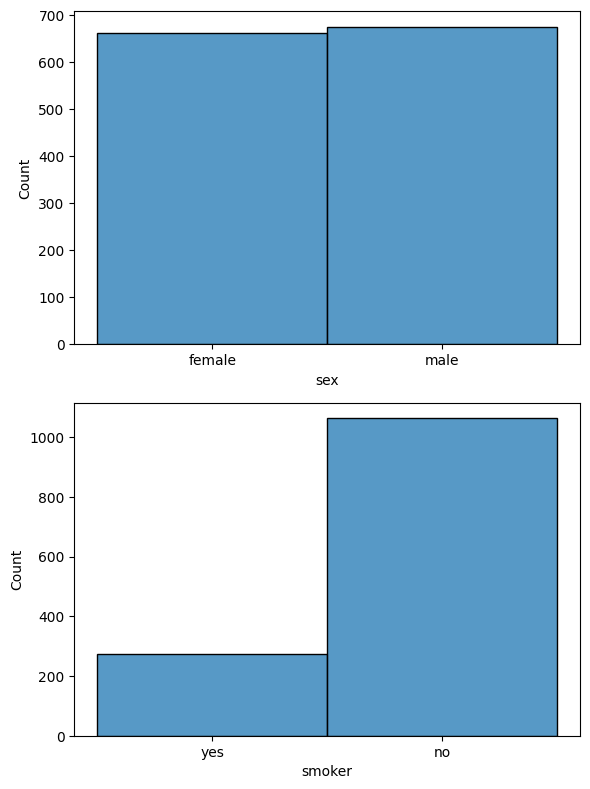

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns


# Analisis de variables categóricas


fig, axis = plt.subplots(2, 1 , figsize = (6, 8))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "sex")
sns.histplot(ax = axis[1], data = total_data, x = "smoker")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = gro

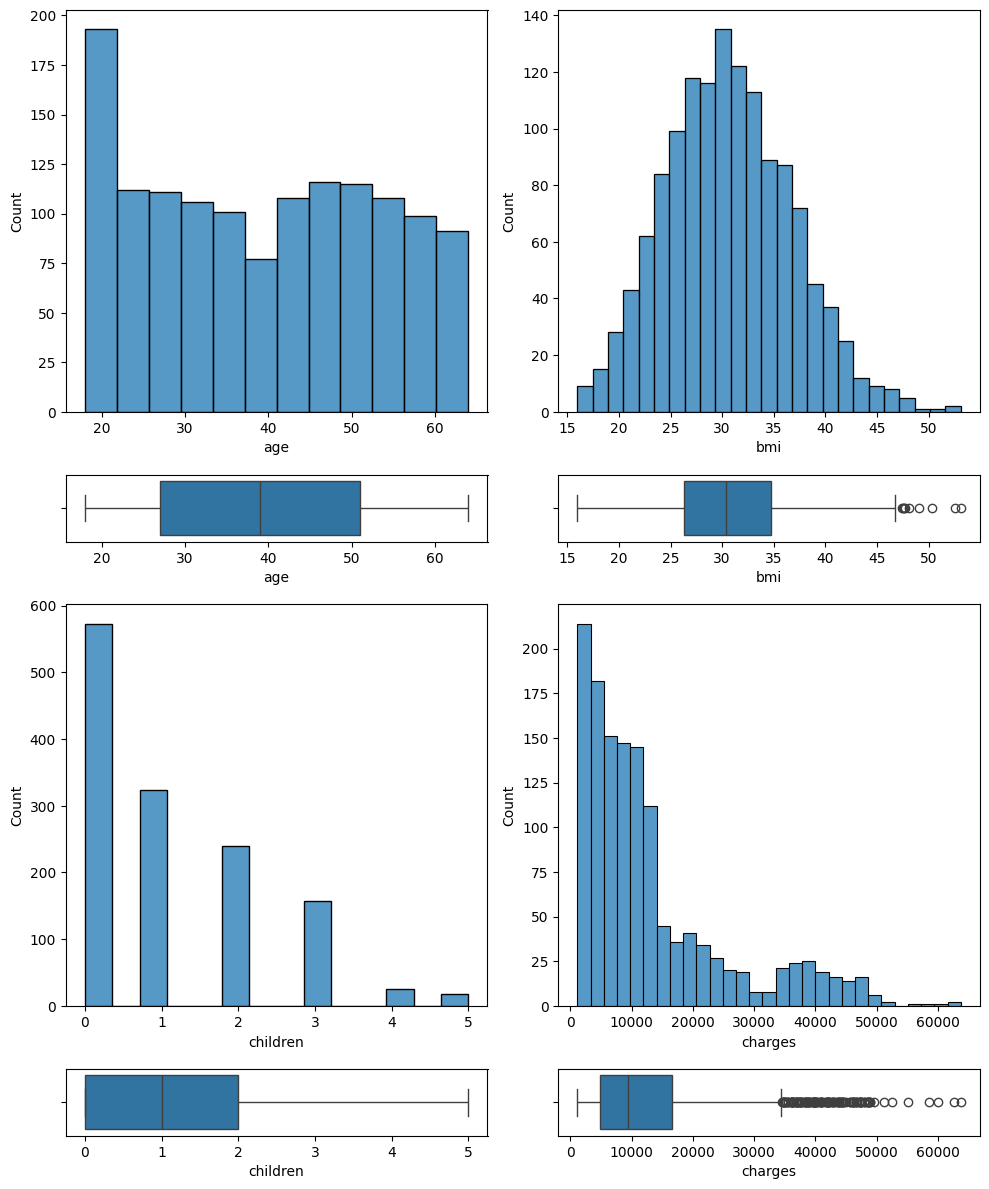

In [26]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = total_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "children")

sns.histplot(ax = axis[2, 1], data = total_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

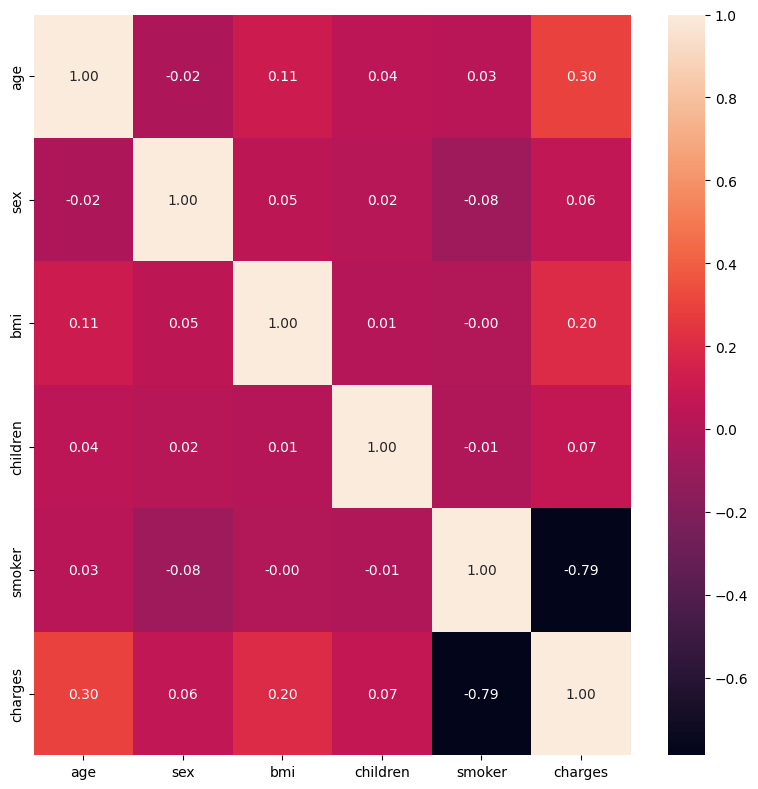

In [27]:
# Factorizar las variables categoricas.
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]

fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker", "charges"]].corr(), annot = True, fmt = ".2f")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

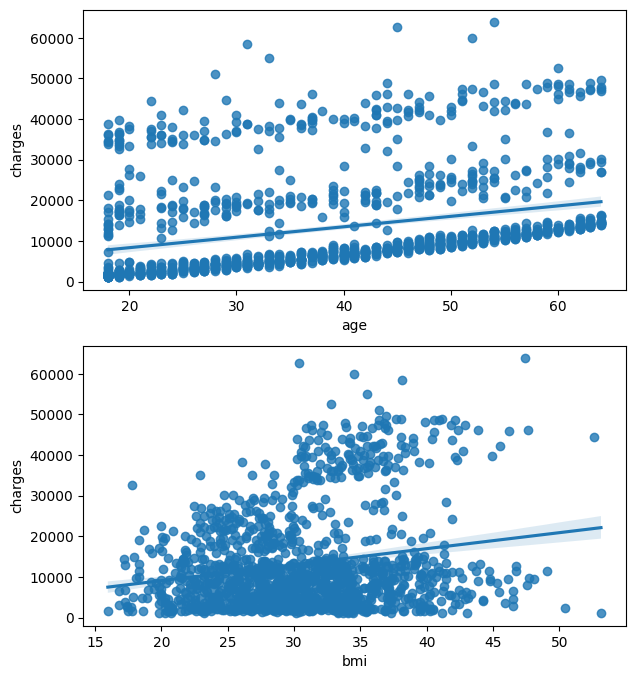

In [28]:
#Analizar correlaciones

fig, axis = plt.subplots(2,1, figsize = (7, 8))

sns.regplot(ax = axis[0], data = total_data, x = "age", y = "charges")
sns.regplot(ax = axis[1], data = total_data, x = "bmi", y = "charges")


plt.show()

In [29]:
#Visualizar datos

total_data.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = gro

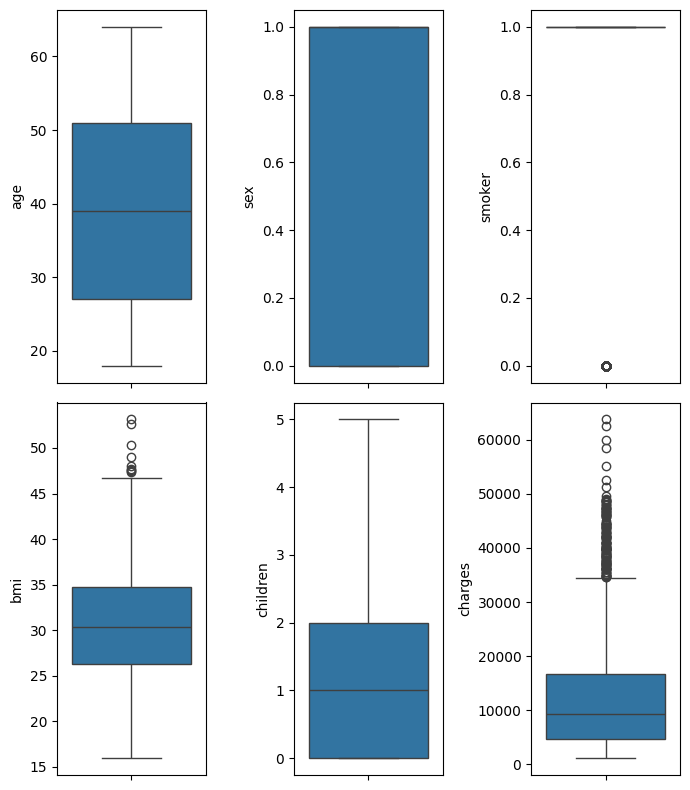

In [30]:
#Dibujar diagramas de cajas

fig, axis = plt.subplots(2, 3, figsize = (7, 8))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "sex")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "children")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "smoker")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "charges")


plt.tight_layout()

plt.show()

In [31]:
#Analisis de nulos

total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "sex", "bmi", "children", "smoker"]

X = total_data.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex,bmi,children,smoker
1114,23,1,24.510,0,1
968,21,1,25.745,2,1
599,52,0,37.525,2,1
170,63,1,41.470,0,1
275,47,0,26.600,2,1


In [33]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex", "smoker", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex,smoker,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.043816


In [34]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,sex,smoker
0,0.108696,0.230024,0.0,1.0,1.0
1,0.065217,0.263250,0.4,1.0,1.0
2,0.739130,0.580172,0.4,0.0,1.0
3,0.978261,0.686306,0.0,1.0,1.0
4,0.630435,0.286252,0.4,0.0,1.0


In [35]:
X_test_sel.head()

,age,bmi,children,sex,smoker
0,0.673913,0.176352,0.0,1.0,1.0
1,0.239130,0.259349,0.8,0.0,1.0
2,0.717391,0.549502,0.6,0.0,1.0
3,0.282609,0.495830,0.6,1.0,0.0
4,0.282609,0.603444,0.4,1.0,1.0


In [36]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

In [37]:
X_train_sel.to_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_train.csv", index=False)
X_test_sel.to_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_test.csv", index=False)

Paso 3: Construye un modelo de regresión lineal

In [38]:
train_data = pd.read_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_train.csv")
test_data = pd.read_csv("/workspace/med-insurance-lr-model/data/processed/clean_insurance_test.csv")

train_data.head()

,age,bmi,children,sex,smoker,charges
0,0.108696,0.230024,0.0,1.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,1.0,0.034446
2,0.739130,0.580172,0.4,0.0,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,1.0,0.196070
4,0.630435,0.286252,0.4,0.0,1.0,0.137177


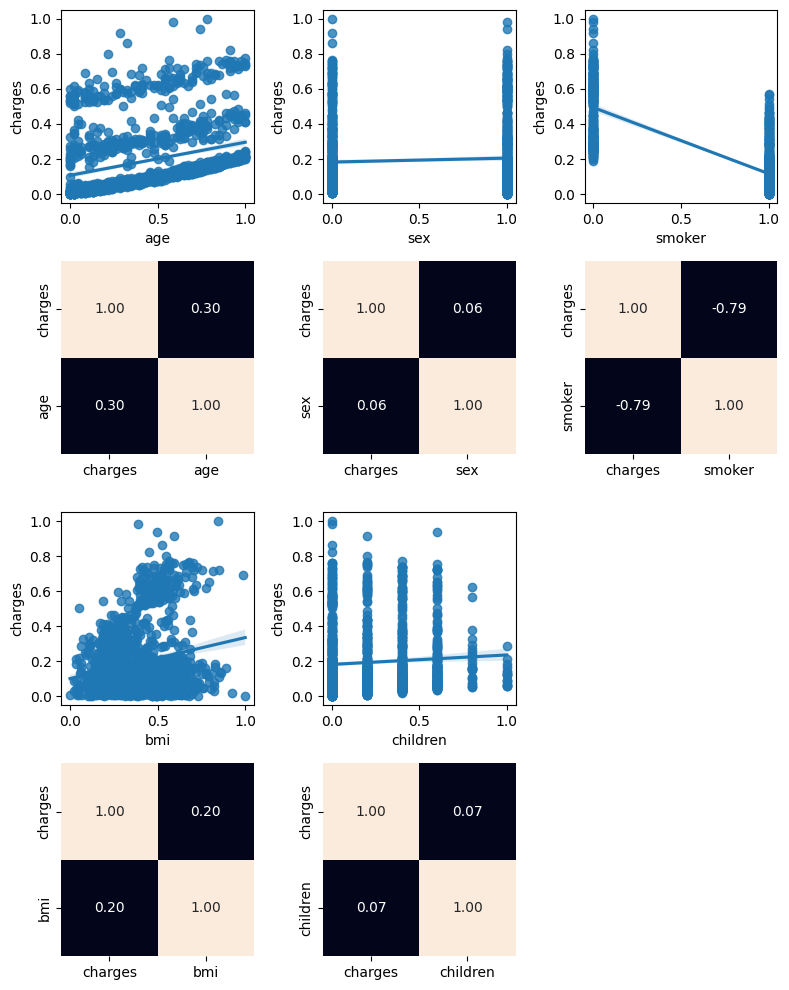

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 3, figsize = (8, 10))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "sex", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "sex"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(data = total_data, x = "smoker", y = "charges", ax = axis[0, 2])
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()

In [40]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

Inicialización y entrenamiento del modelo

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
print(f"Intercep: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercep: 0.3203501952546872
Coeficiente: [ 0.18289935  0.18131339  0.04293502 -0.00135721 -0.36794733]


Predicción del modelo

In [43]:
y_pred = model.predict(X_test)
y_pred

array([ 1.06278880e-01,  7.75111183e-02,  2.09006406e-01,  4.86343560e-01,
        1.29321026e-01,  1.96597743e-01,  4.58426905e-01,  8.98925865e-03,
        1.56389743e-01,  1.62161230e-01,  1.48397883e-01,  5.09788093e-01,
        4.69438384e-01,  2.60151710e-01,  1.45143530e-01,  1.37718714e-01,
        5.07050721e-02,  4.93001056e-01,  3.77835811e-02,  7.12131265e-02,
        4.34752752e-02,  4.58001767e-01,  2.23173949e-01,  4.71271422e-01,
        4.75452764e-01,  6.76984638e-02,  5.52020704e-01,  5.68132723e-01,
        1.56539344e-01,  2.00600742e-01,  7.77732443e-02,  1.89840514e-01,
       -4.46562665e-03,  1.78943192e-01,  6.16900337e-01,  1.81174078e-01,
        6.09712422e-02,  4.53397717e-02,  4.82252611e-01,  1.31294323e-01,
        8.46218686e-02,  4.56852449e-01,  5.41763595e-01,  1.70548767e-01,
        1.00369934e-01,  4.01626205e-02,  7.10346032e-02,  1.28390311e-01,
        4.94081474e-02,  1.31618014e-01,  9.24578657e-02,  1.64760058e-01,
        4.73752733e-01,  

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.009147354269134728
Coeficiente de determinación: 0.8046218811772659
